In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# Create engine function to connect to SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# Declare a Base using automap_base()
Base = automap_base()

# Create Database connection
Base.metadata.create_all(engine)

# Use Base class to relfect the database tables
Base.prepare(autoload_with=engine)

In [12]:
# Print all classes mapped ot the Base
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save classes into variables
measurement = Base.classes.measurement
station = Base.classes.station

In [14]:
# Link Python to the database by creating a SQLAlchemy session
session = Session(engine)

In [15]:
# Display the column titles and first row data in dictionary format for measurement
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb460c5ceb0>,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01'}

In [16]:
# Use inspector to obtain details of the measurement table
inspector = inspect(engine)

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Display the column titles and first row data in dictionary format for station
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb40003cf40>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [18]:
# Use inspector to obtain details of the station table
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
# Query measurement table and display to see if running:
for row in session.query(measurement.station, measurement.tobs, measurement.date,measurement.prcp, 
                         measurement.id).limit(5).all():
    print(row)

('USC00519397', 65.0, '2010-01-01', 0.08, 1)
('USC00519397', 63.0, '2010-01-02', 0.0, 2)
('USC00519397', 74.0, '2010-01-03', 0.0, 3)
('USC00519397', 76.0, '2010-01-04', 0.0, 4)
('USC00519397', 73.0, '2010-01-06', None, 5)


In [20]:
# Query station table and display to see if running:
for row in session.query(station.latitude, station.id, station.elevation, station.station, station.name,
                         station.longitude).limit(5).all():
    print(row)

(21.2716, 1, 3.0, 'USC00519397', 'WAIKIKI 717.2, HI US', -157.8168)
(21.4234, 2, 14.6, 'USC00513117', 'KANEOHE 838.1, HI US', -157.8015)
(21.5213, 3, 7.0, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374)
(21.3934, 4, 11.9, 'USC00517948', 'PEARL CITY, HI US', -157.9751)
(21.4992, 5, 306.6, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', -158.0111)


## Exploratory Precipitation Analysis 

In [21]:
# Find the latest date in the dataset (Order by descending date)
latest_date_str = session.query(measurement.date).\
    order_by(measurement.date.desc()).\
    first()[0]

latest_date = dt.date.fromisoformat(latest_date_str)

print(f"The latest date in the dataset is {latest_date}.")

The latest date in the dataset is 2017-08-23.


In [22]:
# Calculate one year prior to the above date of 2017-08-23:
prior_year_date = latest_date - dt.timedelta(days=365)

print(f"The date one year prior is {prior_year_date}.")

The date one year prior is 2016-08-23.


In [23]:
# Design a query to retrieve the last 12 months of precipitation data - using the previous calculated dates 
yearly_precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date.between(prior_year_date, latest_date)).\
    all()

print(yearly_precipitation_data)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [24]:
# Save the query results as a Pandas DataFrame
raw_yearly_precipitation_df = pd.read_sql(session.query(measurement.date, measurement.prcp).\
    filter(measurement.date.between(prior_year_date, latest_date)).\
    statement,session.bind)


# Completed the following for the Pandas DataFrame: Set index to date column, sort by date, rename columns
raw_yearly_precipitation_df = raw_yearly_precipitation_df.set_index(['date']).\
    sort_values(by='date').\
    rename(columns={'prcp': 'Precipitation'})

raw_yearly_precipitation_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [25]:
# Filter out any NaN/Null values and create final version of DataFrame
clean_yearly_precipitation_df = raw_yearly_precipitation_df.dropna()

yearly_precipitation_df = clean_yearly_precipitation_df
yearly_precipitation_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


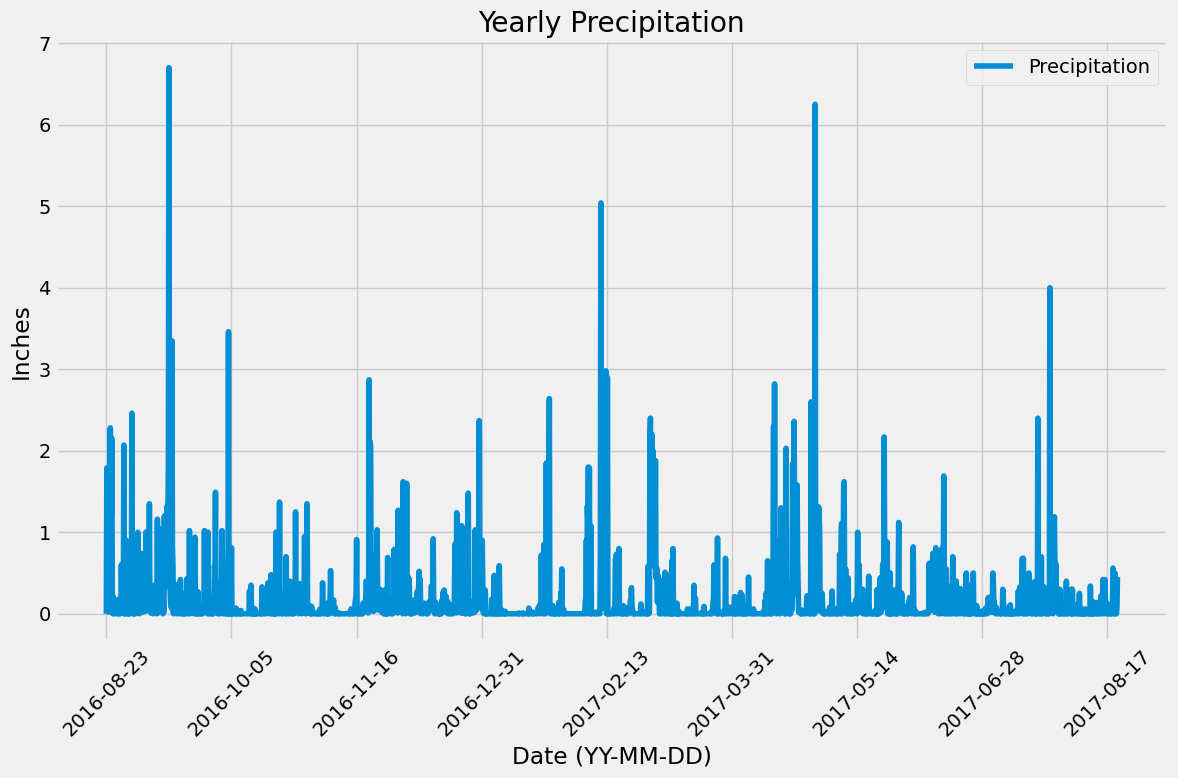

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
yearly_precipitation_df.plot(figsize = (12,8), rot = 45)
plt.title('Yearly Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date (YY-MM-DD)')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearly_precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis 

In [28]:
# Design a query to calculate the total number of stations in the dataset.
tot_stations = session.query(station).distinct().count()

print(f"The total number of stations in the dataset is {tot_stations}.")

The total number of stations in the dataset is 9.


In [29]:
# Design a query to find the most-active stations (that is, the stations that have the most rows). 
# List of all stations and corresponding observation count
all_active_stations = session.query(measurement,
                                    measurement.station,
                                    station.station,
                                    station.name,
                                    func.count(measurement.station).label('station_count')).\
    join(station, measurement.station==station.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    all()


for row in all_active_stations:
    print(f"Station '{row.station}' name '{row.name}' had {row.station_count} observations.")

Station 'USC00519281' name 'WAIHEE 837.5, HI US' had 2772 observations.
Station 'USC00519397' name 'WAIKIKI 717.2, HI US' had 2724 observations.
Station 'USC00513117' name 'KANEOHE 838.1, HI US' had 2709 observations.
Station 'USC00519523' name 'WAIMANALO EXPERIMENTAL FARM, HI US' had 2669 observations.
Station 'USC00516128' name 'MANOA LYON ARBO 785.2, HI US' had 2612 observations.
Station 'USC00514830' name 'KUALOA RANCH HEADQUARTERS 886.9, HI US' had 2202 observations.
Station 'USC00511918' name 'HONOLULU OBSERVATORY 702.2, HI US' had 1979 observations.
Station 'USC00517948' name 'PEARL CITY, HI US' had 1372 observations.
Station 'USC00518838' name 'UPPER WAHIAWA 874.3, HI US' had 511 observations.


In [30]:
# Retrieve most active station from query above
top_active_station = session.query(measurement,
                                   measurement.station,
                                   station.station,
                                   station.name, 
                                   func.count(measurement.station).label('station_count')).\
    join(station, measurement.station==station.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    first()

print(f"Station '{top_active_station.station}' name '{top_active_station.name}' had the most observations with {top_active_station.station_count} observations.")

Station 'USC00519281' name 'WAIHEE 837.5, HI US' had the most observations with 2772 observations.


**Which station has the greatest number of observation counts?**: 
The station ID with the greatest number of observation counts is Station 'USC00519281' with 2772 observation counts.


In [36]:
# Using the station id from the previous query, calculate the lowest, highest and
# average temperature of the most active station.
sel = [measurement.station,
       func.min(measurement.tobs), 
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
station_temp_summary = session.query(*sel).\
        filter(measurement.station == 'USC00519281').\
        group_by(measurement.station)
for station in station_temp_summary:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [31]:
# Use above query to complete print statements. 
top_active_station = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    first()
t_station = top_active_station.station


top_active_station_stats = session.query(measurement, 
                                  func.max(measurement.tobs).label('max_temp'),
                                  func.min(measurement.tobs).label('min_temp'),
                                  func.avg(measurement.tobs).label('avg_temp'),
                                  station.station.label('stn_stn'),
                                  station.name.label('stn_name')).\
                    join(station, measurement.station==station.station).\
                    filter(measurement.station==t_station).\
                    first()

print(f"Station '{top_active_station_stats.stn_stn}' name '{top_active_station_stats.stn_name}' had a maximum temperature of {top_active_station_stats.max_temp} degrees Farenheit.")
print(f"Station '{top_active_station_stats.stn_stn}' name '{top_active_station_stats.stn_name}' had a minimum temperature of {top_active_station_stats.min_temp} degrees Farenheit.")
print(f"Station '{top_active_station_stats.stn_stn}' name '{top_active_station_stats.stn_name}' had an average temperature of {top_active_station_stats.avg_temp} degrees Farenheit.")

Station 'USC00519281' name 'WAIHEE 837.5, HI US' had a maximum temperature of 85.0 degrees Farenheit.
Station 'USC00519281' name 'WAIHEE 837.5, HI US' had a minimum temperature of 54.0 degrees Farenheit.
Station 'USC00519281' name 'WAIHEE 837.5, HI US' had an average temperature of 71.66378066378067 degrees Farenheit.


In [32]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data. 
# To do so, complete the following steps:
    # Filter by the active station = "USC00519281" (station with greatest number of observations)
    # Convert into Pandas DataFrame

    
# Find latest date for most active station = Station "USC00519281".
latest_date_str = session.query(measurement.date).\
    filter(measurement.station==t_station).\
    order_by(measurement.date.desc()).\
    first()[0]

latest_date = dt.date.fromisoformat(latest_date_str)

print(f"The latest date in the dataset is {latest_date}.")
    

# Calculate one year prior to the above date of 2017-08-18 for Station "USC00519281".
one_year_prior = latest_date - dt.timedelta(days=365)

print(f"The one year prior date for Station USC00519281 is {one_year_prior}.")


# Design a query to retrieve the last 12 months of temperature data
yearly_temperature_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date.between(one_year_prior, latest_date)).all()

print(yearly_precipitation_data)

The latest date in the dataset is 2017-08-18.
The one year prior date for Station USC00519281 is 2016-08-18.
[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-0

In [33]:
# Convert into Pandas DataFrame and query previous 12 months of TOBS data for Station "USC00519281".
raw_yearly_temperature_df = pd.read_sql(session.query(measurement.date, measurement.tobs).\
    filter(measurement.date.between(one_year_prior, latest_date)).\
    filter(measurement.station==t_station).\
    statement,session.bind) 

# Rename columns, drop any NaN/Null values then create final version of DataFrame
raw_yearly_temperature_df = raw_yearly_temperature_df.rename(columns={'tobs': 'Temperature Observations'})
clean_yearly_temperature_df = raw_yearly_temperature_df.dropna()

yearly_temperature_df = clean_yearly_temperature_df
yearly_temperature_df.head()

,date,Temperature Observations
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


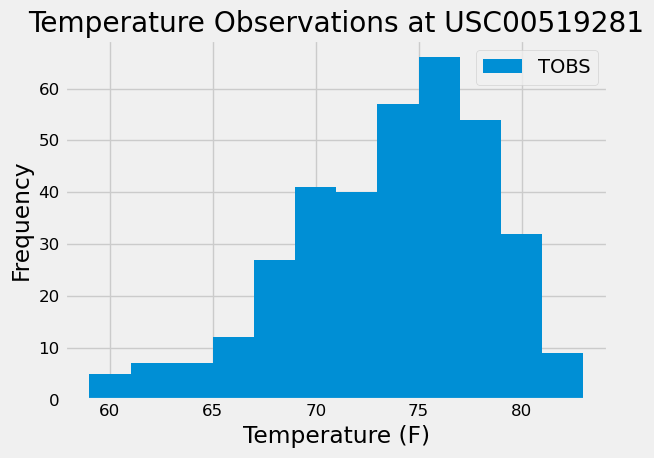

In [43]:
# Plot the above DataFrame results as a histogram with bins=12
plt.hist(yearly_temperature_df['Temperature Observations'], bins=12, label="TOBS")
plt.title("Temperature Observations at USC00519281")
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## Close Session

In [ ]:
session.close()